In [1]:
import scipy as sp # для решения научных и математических задач, позволяет визуализировать данные
import numpy as np # для работы с массивами и матрицами, выполнения математических операций
import pandas as pd # для обработки и анализа структурированных данных, для работы с таблицами данных

import scipy.linalg as sla # модуль для линейной алгебры
import scipy.sparse as sps # модуль для работы с разреженными матрицами (матрицы, в которых большинство элементов равны нулю)
import scipy.sparse.linalg as spla # модуль для работы с разреженными матрицами и решения линейных уравнений

import matplotlib.pyplot as plt # для создания графиков и визуализации данных
# %pylab inline # импортирует модули numpy и matplotlib.pyplot и настраивает их для интерактивной визуализации графиков в блокнотах Jupyter

In [2]:
import warnings
warnings.filterwarnings('ignore')

# PCA


У нас есть объект - матрица признаков $F$ размером l x n

Для PCA основной задачей является нахождение такой весовой матрицы $W$ такую, что
$$G = FW, s.t.   ||GW^T - F||^2 -> min$$
где $G$ - матрица главных компонент $F$ размером l x m, $W$ матрица преобразования размера n x m страых признаков к новым

Столбцы матрицы $W$ представляют собой главные оси в пространстве признаков

`PCA` - это техника, используемая для уменьшения размерности, которая предполагает преобразование набора данных в более низкоразмерное пространство с сохранением как можно большей части исходной информации. 

Класс PCA в scikit-learn предоставляет методы для подгонки модели PCA к набору данных, преобразования набора данных в более низкоразмерное пространство и восстановления исходного набора данных из преобразованных данных.

`Линейный дискриминантный анализ (LDA)` - это метод, используемый для уменьшения размерности и задач классификации. 

Класс LDA в scikit-learn предоставляет методы для подгонки модели LDA к набору данных, преобразования набора данных в более низкоразмерное пространство и предсказания меток классов новых точек данных. 

`K-Nearest Neighbors (KNN)` - это алгоритм классификации, который работает путем нахождения k ближайших точек данных в обучающем множестве к новой точке данных и присвоения новой точке данных метки класса большинства из этих k соседей. 

Класс KNeighborsClassifier в scikit-learn предоставляет методы для настройки модели KNN на набор данных, предсказания меток классов новых точек данных и оценки эффективности модели.

`Pipeline` позволяет объединять несколько шагов вместе и обеспечивает их последовательное выполнение. Это упрощает процесс предобработки данных и моделирования, так как каждый шаг можно настроить отдельно или вместе с другими шагами

`StandardScaler` - это класс для масштабирования признаков, который преобразует каждый признак путем удаления среднего значения и масштабирования до единичной дисперсии. Масштабирование признаков может улучшить работу модели, так как многие алгоритмы машинного обучения работают лучше, когда все признаки находятся в одном диапазоне.

In [3]:
from sklearn import datasets # модуль с наборами данных примеров 
from sklearn.model_selection import train_test_split # функция для разделения набора данных на обучающий и тестовый наборы
from sklearn.decomposition import PCA # для импорта класса PCA (Principal Component Analysis) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # для импорта класса LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier #  для импорта класса KNeighborsClassifier
from sklearn.pipeline import make_pipeline # функция для создания объекта конвейера, который последовательно применяет список преобразований и конечный оценщик
from sklearn.preprocessing import StandardScaler # для импорта класса StandardScaler
random_state = 0 # сид

# Загрузить набор данных Digits
# датасет MNIST, который содержит изображения рукописных цифр от 0 до 9
# X  - массив, содержащий пиксели каждого изображения в виде вектора размерности 64 (8х8) 
# y - массив, содержащий метки классов для каждого изображения (цифры от 0 до 9)
# параметр return_X_y=True, чтобы вернуть и X и y 
X, y = datasets.load_digits(return_X_y=True) 

# Разделить данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.5, # выделяем на тестовую выборку 50% данных 
                                                    stratify = y, # гарантирует, что распределение классов в обучающей и тестовой выборках будет соответствовать распределению классов в исходном наборе данных
                                                    random_state = random_state) # сид

Здесь мы будем изучать нечто вроде набора данных MNIST - изображения чисел от 0 до 9, каждое из которых имеет размер 8x8 пикселей.

In [4]:
# X  - массив, содержащий пиксели каждого изображения в виде вектора размерности 64 (8х8) 
# y - массив, содержащий метки классов для каждого изображения (цифры от 0 до 9)
X.shape, y.shape # размеры массивов X и y соответственно

((1797, 64), (1797,))

В контексте обработки изображений, интерполяция - это процесс вычисления значений пикселей в новом изображении на основе значений пикселей в исходном изображении. 

При изменении размера изображения (увеличении или уменьшении) или при повороте изображения, новые значения пикселей могут попадать между существующими пикселями в исходном изображении. Интерполяция решает эту проблему, вычисляя новые значения пикселей на основе значений соседних пикселей в исходном изображении.

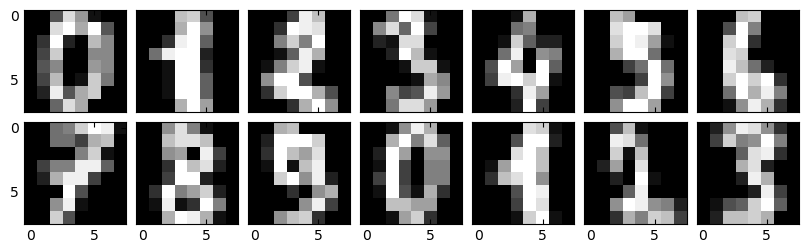

In [5]:
from mpl_toolkits.axes_grid import ImageGrid # для настройки позиционирования нескольких осей с фиксированным углом наклона, например, для отображения изображений

fig = plt.figure(1, (10, 10)) # создает фигуру номер 1 размером 10 на 10
grid = ImageGrid(fig, # создает сетку графиков внутри fig
                 111, # указывает позицию сетки внутри фигуры. первая цифра определяет количество строк в сетке, вторая - количество столбцов, а третья - порядковый номер конкретного графика в сетке
                 nrows_ncols = (2, 7), # сетка должна иметь 2 строки и 7 столбцов графиков
                 axes_pad = 0.1) # задает расстояние между графиками в 0.1 дюйма
 
for i in range(14): # делает 14 картинок
    # для каждой картинки сжимает массив изображения, чтобы удалить любые 
    # размерности с длиной 1, затем изменяет форму одномерного массива на
    # двумерный массив с формой (8, 8)
    image = X[i, :].squeeze().reshape(8, 8)
    # вызывается метод `imshow()` `i`-го подграфика в объекте `grid`, который 
    # отображает изображение, используя градацию серого цвета без интерполяции.
    grid[i].imshow(image, cmap = 'gray', interpolation = 'none')

Мы можем объединить все предварительные обработки данных и алгоритмы, которые мы хотим приспособить, с помощью инструмента sklearn make_pipeline. Это очень удобно, когда вы хотите написать более ремонтопригодный код, который будет легко проверить на ошибки и изменения

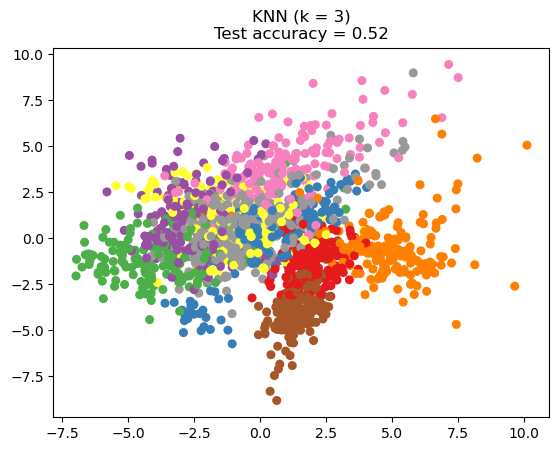

In [6]:
dim = len(X[0]) # количество признаков в наборе данных X
n_classes = len(np.unique(y)) # количество уникальных меток классов в наборе данных y

n_neighbors = 3 # устанавливаем количество ближайших соседей для knn

# определяет, сколько информации оригинального набора данных мы хотитм сохранить
# Главные компоненты являются направлениями, в которых данные имеют наибольшую 
# дисперсию. Таким образом, главные компоненты содержат наиболее значимую 
# информацию об исходных данных
n_components = 2 # устанавливаем количество главных компонент, которые нужно 
                 # сохранить после уменьшения размерности с помощью PCA

# Уменьшение размерности до 2 с помощью PCA
# создает конвейер, который сначала масштабирует данные с помощью StandardScaler
# затем выполняет уменьшение размерности с помощью PCA с n_components компонентами
# и обучает классификатор KNN с n_neighbors соседями
knn_pca = make_pipeline(StandardScaler(), 
                        PCA(n_components = n_components, random_state = 1543),
                        KNeighborsClassifier(n_neighbors = n_neighbors))

# Обучить модели метода
knn_pca.fit(X_train, y_train) # обучает кнн на обучающих данных
acc_knn = knn_pca.score(X_test, y_test) # вычисляет точность обученного классификатора на тестовой выборке

# Вложить набор данных в 2 измерения, используя установленную модель
# применяем обученную модель PCA для уменьшения размерности данных до 2-х измерений
X_transformed = knn_pca[:-1].transform(X)

# Построить график прогнозируемых баллов и показать оценочный балл
plt.figure() # создаем новую фигуру для графика
# делаем точечную диаграмму
plt.scatter(X_transformed[:, 0], # указывает значения которые соответствуют первой главной компоненте преобразованных данных
            X_transformed[:, 1], # соответствуют второй главной компоненте
            c = y, # каждому уникальному значению y будет присвоен свой цвет
            s = 30, # размер каждой точки
            cmap = 'Set1') # для указания цветовой карты
plt.title('KNN (k = {})\nTest accuracy = {:.2f}'.format(n_neighbors, # заголовок графика
                                                        acc_knn))
plt.show()

In [7]:
# эта функция будет используется для вычисления точности модели на основе 
# метода k-ближайших соседей (k-NN) с использованием PCA (метод главных 
# компонент) для уменьшения размерности данных
from sklearn.pipeline import Pipeline

def calculate_score(n_neighbors, n_components):
    ### В этой функции реализуется подгонка pipeline
    ### с заданным количеством соседей и компонент PCA
    ### на обучающих данных
    ### и оценить его на тестовых данных.
    
    pipe = Pipeline([('pca', PCA(n_components = n_components)), 
                     ('knn', KNeighborsClassifier(n_neighbors = n_neighbors))])
    
    pipe.fit(X_train, y_train)

    ### Вернуть результат теста
    score = pipe.score(X_test, y_test)
    return score

построить график зависимости оценки от n_neigbours и n_components

Text(0, 0.5, 'N_neigbours')

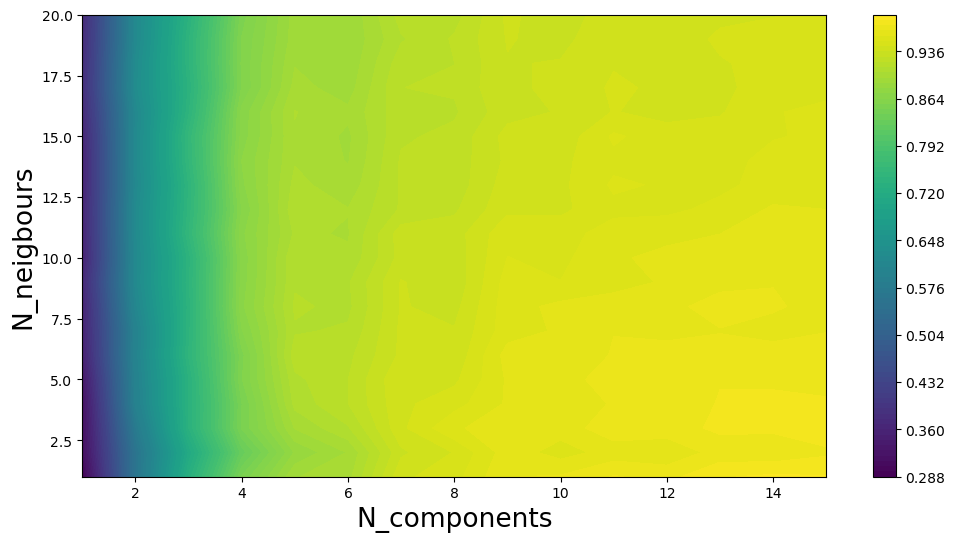

In [8]:
# заполняется значениями, полученными при вызове функции 
# calculate_score(n_n, n_c) со значениями n_n (количество соседей) и
# n_c (количество главных компонент)
results = [] 

neighbors = range(1, 21) # массив с соседями от 1 до 20
components = range(1, 16) # массив с компонентами от 1 до 15


for n_n in neighbors: # берет n_n соседа
    for n_c in components: # выполняет код ниже с этим соседом по всем компонентам
        # Для каждой комбинации гиперпараметров вызывается функция calculate_score
        # для расчета точности алгоритма KNN и добавляет их в results 
        results.append(calculate_score(n_n, n_c)) 

# создаем массивы x_pos и y_pos с помощью функции meshgrid, массивы используются
# для построения графика контуров. На оси x - будут компоненты, на y - соседи
x_pos, y_pos = np.meshgrid(components, neighbors)
plt.figure(figsize = (12, 6)) # задаем размер фигуры
# создаем график контуров
# x_pos и y_pos - массивы координат точек на плоскости
# np.array(results).reshape(x_pos.shape) - изменение формы results на форму
# массива x_pos
# levels = 100 - количество уровней, на которые разбивается диапазон значений 
# функции для визуализации на графике
plt.contourf(x_pos, y_pos, np.array(results).reshape(x_pos.shape), levels=100)
plt.colorbar() # добавляет шкалу цветов

# добавляем подписи
plt.xlabel("N_components",fontsize = 19)
plt.ylabel("N_neigbours",fontsize = 19)

# Возьмем другой набор данных о винах и посмотрим на эффект от стандартизации данных

In [9]:
from sklearn.datasets import load_wine

RANDOM_STATE = 42 # сид
FIG_SIZE = (10, 7) # размер фигуры

# датафрейм, содержит в себе данные о вине, данные были взяты из 'data',
# названия столбцов из 'feature_names'
'''
если return_X_y = False, то функция load_wine вернет объект типа Bunch. 
Объект Bunch это словарь, содержащий данные и метки классов, а также 
метаданные о датасете. В этом случае мы можем получить данные и метки 
классов, обращаясь к соответствующим ключам словаря

если return_X_y = True, то функция load_wine вернет кортеж, содержащий массив
данных и метки классов. В этом случае мы можем получить данные и метки классов,
обращаясь к соответствующим элементам кортежа

return_X_y по умолчанию False
'''
features = pd.DataFrame(load_wine(return_X_y = False)['data'],
                        columns = load_wine(return_X_y = False)['feature_names'])

# target это массив, содержащий метки классов для каждого объекта в датасете.
# В данном случае, это три класса вина
target = load_wine(return_X_y = False)['target']
features.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# Сделайте разделение обучающих и тестовых данных, используя 30% тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size = 0.30,
                                                    random_state = RANDOM_STATE)

Хорошо, теперь, когда вы знаете, как сделать pipeline, сделайте pipeline со standard scaler и PCA и просто PCA.

`StandardScaler` - это класс для масштабирования признаков, который преобразует каждый признак путем удаления среднего значения и масштабирования до единичной дисперсии.

In [11]:
from sklearn.preprocessing import StandardScaler

# обучение на данных и прогнозирование с помощью pipelined PCA
unscaled_clf = Pipeline([('pca', PCA(n_components = 2))])
unscaled_clf.fit(X_train, y_train)

# Подгонка к данным и прогнозирование с помощью pipelined scaling, PCA
std_clf = Pipeline([('standardscaler', StandardScaler()), ('pca', PCA(n_components = 2))])
std_clf.fit(X_train, y_train)

# Извлечение PCA из pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


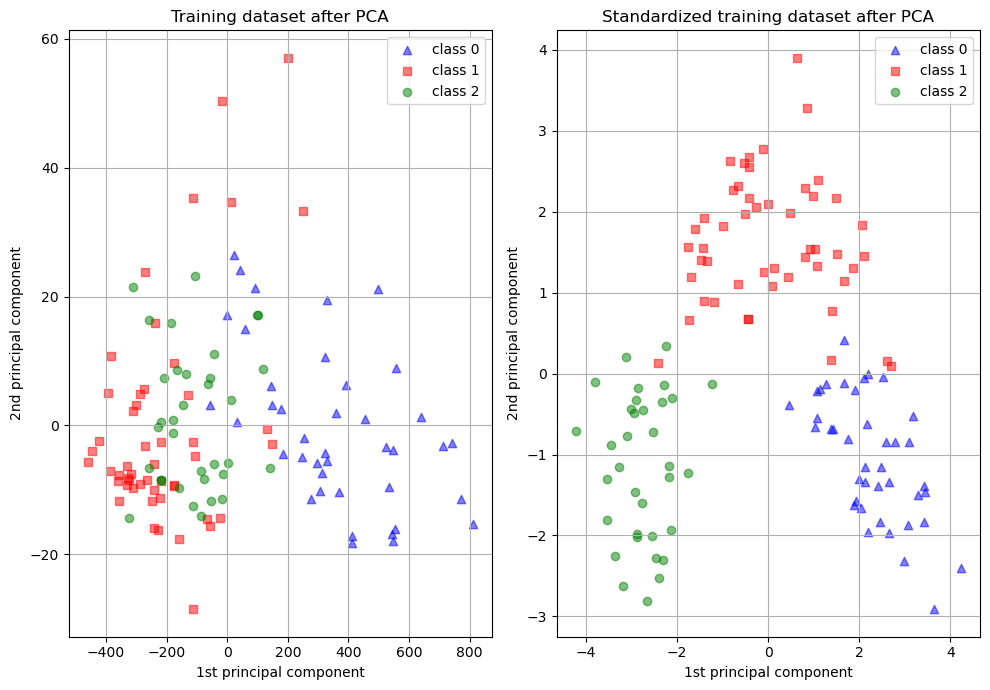

In [12]:
# Показать первые главные компоненты
print('\nPC 1 without scaling:\n', pca.components_[0]) # без масштабирования
print('\nPC 1 with scaling:\n', pca_std.components_[0]) # с масштабированием 

# Используйте PCA без и с масштабом на данных X_train для визуализации

# применяет снижение размерности к набору данных X_train и возвращает новый 
# набор данных X_train_transformed с меньшим количеством измерений, где каждая
# строка представляет собой образец, а каждый столбец представляет главную
# компоненту
# Метод transform проецирует данные на главные компоненты
X_train_transformed = pca.transform(X_train)

# используют метод со стандартизацией данных на данных X_train

# перед применением метода transform данные из набора X_train были 
# стандартизированы с помощью объекта scaler методом transform(). Это позволяет
# получить преобразованные данные, которые учитывают структуру и масштаб исходных
# данных
scaler = std_clf.named_steps['standardscaler'] # выбирается шаг 
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# визуализация стандартизированного и нетронутого набора данных с помощью PCA
# создает графическое окно с двумя подокнами (ax1, ax2), расположенными 
# горизонтально ncols=2, используя размеры FIG_SIZE
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=FIG_SIZE)


# Cоздаем точечный график на первом подокне (ax1). Для каждого значения l в 
# диапазоне от 0 до 2 (range(0, 3)), используются соответствующие цвета (c)
# ('blue', 'red', 'green') и маркеры (m) ('^', 's', 'o')
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    # В качестве координат точек используются значения первых двух главных 
    # компонент, рассчитанных с помощью метода transform() объекта PCA
    # Точки отображаются на графике с различными цветами, в зависимости от
    # значения y_train (метки классов), используя условие y_train == l
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color = c, # цвет
                label = 'class %s' % l,
                alpha = 0.5, # прозрачность точек
                marker = m) # маркер

# то же самое для второго графика, только со значениями рассчитанными
# со стандартизацией данных
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m)

# заголовки
ax1.set_title('Training dataset after PCA') 
ax2.set_title('Standardized training dataset after PCA')


for ax in (ax1, ax2):
    # подписи осей
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    
    ax.legend(loc='upper right') # расположение legend
    ax.grid() # сетка

# автоматически регулирует расстояния между подзаголовками и метками осей, 
# чтобы избежать наложения их друг на друга
plt.tight_layout() 

plt.show()

# Постройте график зависимости объясненной дисперсии от числа компонентов. Для этого используйте доступные методы класса PCA.

Объясненная дисперсия (explained variance) - это мера того, насколько хорошо модель описывает данные. В контексте метода главных компонент (PCA), объясненная дисперсия отражает количество информации (дисперсии) в данных, которое может быть объяснено каждой главной компонентой.

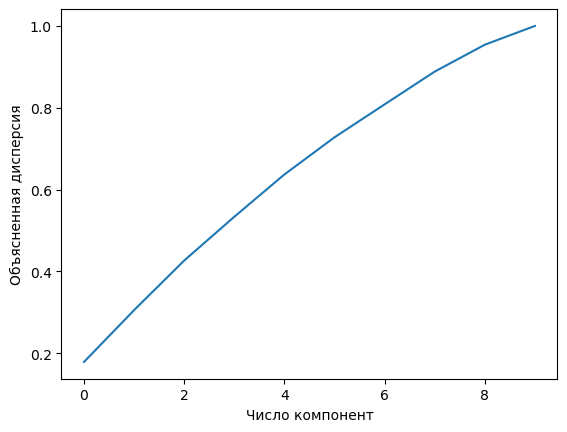

In [13]:
# Создаем случайные данные
X = np.random.rand(100, 10)

# Создаем объект PCA
pca = PCA()

# Применяем PCA к данным
pca.fit(X)

# Получаем объясненную дисперсию для каждого числа компонентов
# np.cumsum в библиотеке NumPy возвращает кумулятивную сумму элементов массива по заданной оси. 
# Например, если у нас есть массив [1, 2, 3, 4], то np.cumsum([1, 2, 3, 4]) вернет 
# массив [1, 3, 6, 10]
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Строим график
plt.plot(explained_variance)
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')
plt.show()

# SVD decomposition

если M - матрица m x n над полем K, то существует ее факторизация:
$$M = U * S * V^{\dagger}, where$$
- $U$ - ортогональная матрица m x m над K
- $S$ - диагональная матрица m x n с неотрицательными вещественными числами,
- $V$ - ортогональная матрица размером n x n над K.

Значения $s_i$ матрицы S известны как сингулярные значения M. Это разложение называется сингулярным разложением значений - SVD (Singular Value Decomposition)

Колонны из $U$ anv $V$ называются левым и правым сингулярными векторами от $M$:
$$M v = s u, M^{\dagger} u = sv$$

Различные применения в математике и оптимизации - псевдоинверсные вычисления, факторизация низкого ранга, применение в решении систем уравнений ...

Если мы определим матрицу $M$ как $F$ и
$$G = U * S$$

мы получим полное разложение PCA, где весовая матрица $W$ теперь $V$

Итак, для получения первых K главных компонент мы просто возьмем первые K столбцов матрицы $S * U$

SVD-разложение (Singular Value Decomposition) - это метод разложения матрицы на три матрицы меньшего размера. 

Принцип работы SVD-разложения заключается в том, что любую прямоугольную матрицу A можно представить в виде произведения трех матриц: A = U * S * V^T, где U и V - ортогональные матрицы, а S - диагональная матрица, на диагонали которой стоят сингулярные значения матрицы A, упорядоченные по убыванию. 

Сингулярные значения являются мерой важности каждого измерения в данных. Чем больше сингулярное значение, тем больше информации оно содержит о данных. Сингулярные значения также могут быть использованы для снижения размерности данных. Например, если мы хотим уменьшить размерность матрицы A с помощью SVD, мы можем выбрать только первые k сингулярных значений и соответствующие им столбцы из матриц U и V, чтобы получить новую матрицу меньшего размера.

# Мы также можем рассмотреть эти компоненты в начальном базисе М. Для этого мы умножим их на первые K строк матрицы $V^{\dagger}$

In [14]:
from PIL import Image # для работы с изображениями
from matplotlib.pyplot import imread # для чтения картинок
from skimage import color # позволяет использовать функционал библиотеки scikit-image для работы 
                          # с цветовыми пространствами изображений

# imread() используется для чтения изображения из файла
# color.rgb2gray() используется для преобразования цветного изображения в оттенки серого
img = color.rgb2gray(imread(r'swisscows_edit.jpg')) 
img.shape

(600, 800)

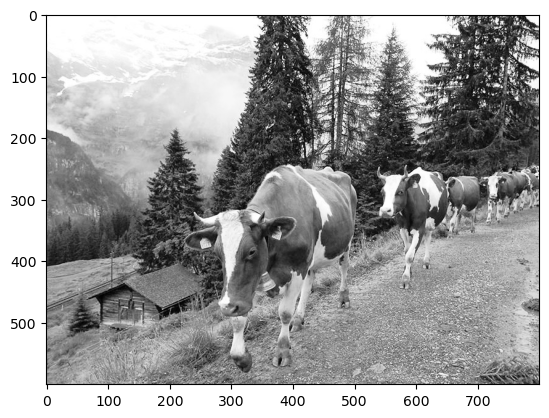

In [15]:
# plt.imshow() используется для отображения изображения
# cmap = 'greys_r' используется для установки цветовой карты на оттенки серого
implot = plt.imshow(img, cmap = 'Greys_r')

# PCA с использованием SVD для сжатия

Мы будем использовать svd из пакета scipy

In [16]:
# U и V_h являются ортогональными матрицами, а s - диагональной матрицей с сингулярными значениями
# в порядке убывания
# Параметр full_matrices=False указывает, что функция SVD должна возвращать только сингулярные 
# значения и матрицы U и V_h, не полные матрицы
U, s, V_h = sla.svd(img, full_matrices = False)
print(U.shape, s.shape, V_h.shape)

(600, 600) (600,) (600, 800)


In [17]:
# используем матрицы U, s и V_h, полученные в результате SVD разложения матрицы изображения,
# чтобы выбрать только первую главную компоненту
# Первая главная компонента может быть получена путем умножения первого столбца матрицы U 
# на первый элемент диагональной матрицы s, а затем на первую строку матрицы V_h
# [:, np.newaxis] и [np.newaxis, :] используются для того, чтобы привести одномерные массивы к
# двумерному виду, необходимому для выполнения матричного умножения
pca_1 = (U[:, 0] * s[0])[:, np.newaxis].dot(V_h[0, :][np.newaxis, :])

# pca_1 - это матрица, содержащая информацию только о первой главной компоненте
pca_1.shape

(600, 800)

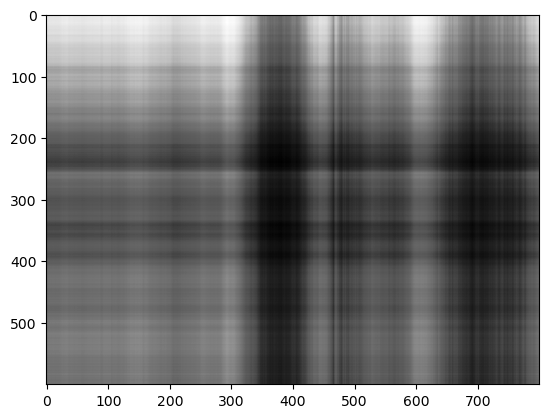

In [18]:
# отображаем только первую главную компоненту
plt.imshow(pca_1, cmap='Greys_r')

# Теперь напишите функцию, которая будет возвращать ценовые компоненты от I-го до J-го в исходном базисе (Подсказка: посмотрите, как мы вычислили первую компоненту в исходном базисе)

In [19]:
U, s, V_h = sla.svd(img, full_matrices=False)
def PCA(start_component = 0, end_component = 1, U = U, s = s, V_h = V_h):
    # U[:, start_component : end_component] - это выборка из матрицы левых сингулярных векторов, 
    # которые являются главными компонентами. start_component : end_component - это диапазон индексов
    # компонент, который мы хотим использовать для проекции
    # s[start_component : end_component] - это выборка из сингулярных значений, соответствующих 
    # главным компонентам, которые мы выбрали в предыдущем шаге
    # V_h[start_component : end_component, :] - это выборка из транспонированной матрицы правых 
    # сингулярных векторов, которые также являются главными компонентами
    
    # умножив выбранные компоненты друг на друга, мы получаем матрицу, которая содержит информацию
    # только о выбранных главных компонентах
    # это позволяет производить анализ данных и извлекать информацию о наиболее важных признаках в данных
    US = (U[:, start_component : end_component] * s[start_component : end_component])\
    .dot(V_h[start_component : end_component, :])

    return US

In [20]:
pca_1 = PCA() # оздаем объект
pca_1_20 = PCA(end_component = 20)
pca_1_50 = PCA(end_component = 50)
pca_20_100 = PCA(20, 100)
pca_20_end = PCA(20, 384)

Text(0.5, 1.0, '20-end PCA')

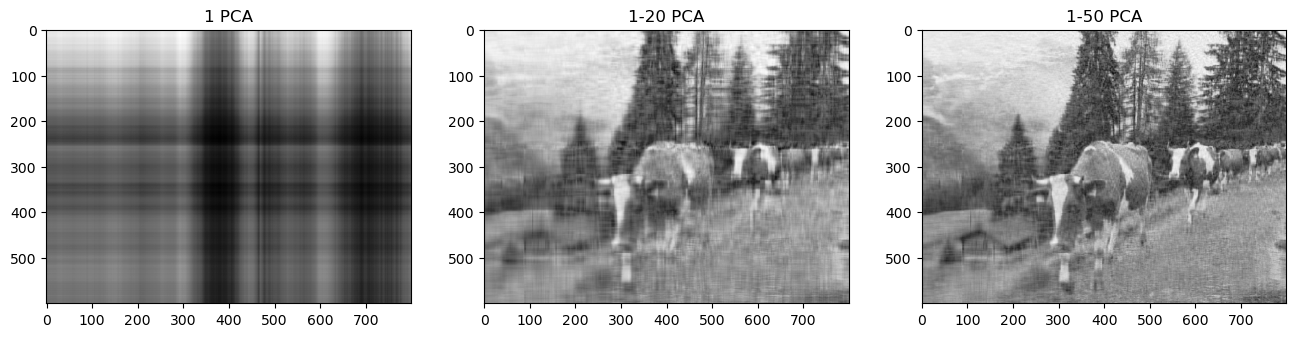

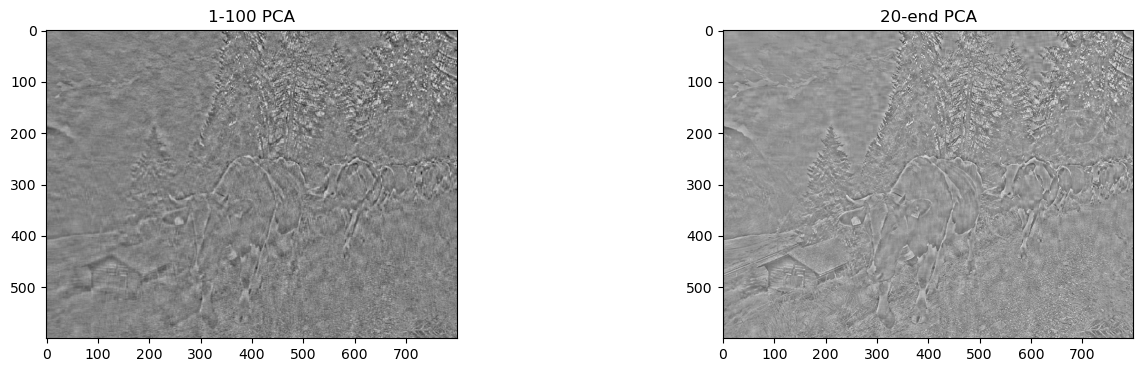

In [21]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 3, 1)
imgplot = plt.imshow(pca_1, cmap = 'Greys_r')
plt.title('1 PCA')

plt.subplot(1, 3, 2)
impglot = plt.imshow(pca_1_20, cmap = 'Greys_r')
plt.title('1-20 PCA')

plt.subplot(1, 3, 3)
imgplot = plt.imshow(pca_1_50, cmap = 'Greys_r')
plt.title('1-50 PCA')

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
imgplot = plt.imshow(pca_20_100, cmap = 'Greys_r')
plt.title('1-100 PCA')

plt.subplot(1, 2, 2)
imgplot = plt.imshow(pca_20_end, cmap = 'Greys_r')
plt.title('20-end PCA')

Text(0.5, 1.0, '20-end PCA')

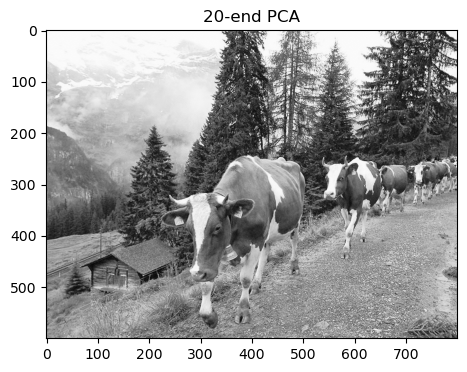

In [22]:
pca_full = PCA(0, 384)

plt.figure(figsize = (16, 4))
plt.subplot(1, 1, 1)
imgplot = plt.imshow(pca_full, cmap = 'Greys_r')
plt.title('20-end PCA')

# Как вы думаете, что отражает 1 компонент PCA? Как вы считаете, 1-50 компоненты дают хороший образ?

In [23]:
img.shape

(600, 800)

Первые компоненты отражают самое большое место, где один глобальный объект переходит в другой. В этом месте происходит наибольшее изменение градиента.

Используя первые компоненты изображения, можно сжать его по размеру, т.е.

Использование первых K компонент дает прирост памяти 

$$\frac{N_{rows} * N_{cols}}{K * (N_{rows} + N_{cols} + 1)}$$